In [1]:
import pickle
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

# hide warnigns for clarity
import warnings
warnings.filterwarnings('ignore')

from plotting_utils import *
setup_formatting()

In [2]:
# config 

# path to data directory
path_dir = '../data/'


save_figs = False
save_folder = './swimmer_figs/'

# swimmer (heavy tail/orig)

### reward curves

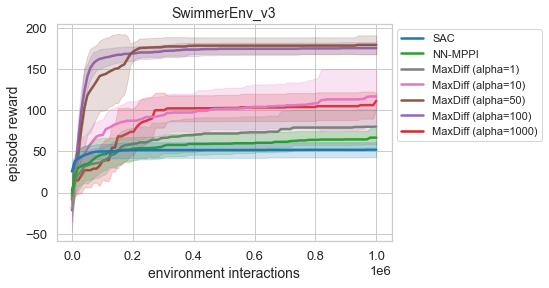

In [3]:
fill = True
plot_max = True

alphas = [1,10,50,100,1000]
envs = ['rew100','H40']+['H40_alpha{}'.format(alpha) for alpha in alphas]
methods = ['sac_orig','mppi'] + ['maxdiff']*(len(alphas))  
plot_legend = ['SAC','NN-MPPI']+['MaxDiff (alpha={})'.format(alpha) for alpha in alphas]

for base_env,ylims in zip(['SwimmerEnv_v3'],[[-150,200]]):
    for data_file,data_type in zip(['reward_data.pkl'],['train']):
        fig, axs = plt.subplots(1, 1)
        colors = {}
        colors['sac_orig'] = iter(sns.color_palette('tab10',n_colors=9)) 
        colors['mppi'] = iter(sns.color_palette('tab10',n_colors=9)[2:]) 
        colors['maxdiff'] = iter(sns.color_palette('tab10_r',n_colors=9))
        next(colors['maxdiff'])
        for env_idx,(env,method,lgd) in enumerate(zip(envs,methods,plot_legend)):
            data_path = path_dir + '{}/{}/'.format(method, base_env + '_' + env)
            data = process_data(data_path,N=100,get_max=plot_max,data_file=data_file)
            plot_data(axs, data, lgd,color=next(colors[method]),fill=fill,zorder=10-env_idx,linewidth=2.5)
            axs.tick_params(axis='both', which='major')

        axs.set_title(base_env)
        axs.set_xlabel( 'environment interactions')
        axs.set_ylabel( 'episode reward' )
        axs.legend(bbox_to_anchor=(1.0,1.0), loc="upper left", ncol=1)
        if save_figs:
            title = 'max' if plot_max else 'mean'
            plt.savefig(f'{save_folder}{base_env}_{title}_combo.svg', bbox_inches='tight')
        plt.show()

### final policy (100 iterations per seed)

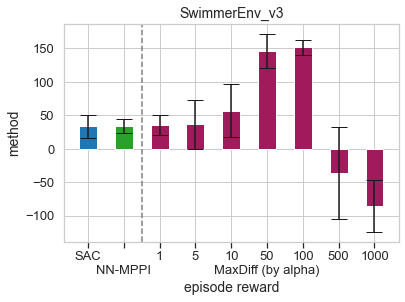

In [4]:
alphas = [1,5,10,50,100,500,1000]
envs = ['rew100','H40']+['H40_alpha{}'.format(alpha) for alpha in alphas]
methods = ['sac_orig','mppi'] + ['maxdiff']*len(alphas)
plot_legend = ['SAC\n','\nNN-MPPI']+['{}\n{}'.format(alpha,'MaxDiff (by alpha)' if alpha==50 else '') for alpha in alphas]

base_env = 'SwimmerEnv_v3'
data_file = 'orig_eval_reward_log.pkl'

fig, axs = plt.subplots(1, 1)
colors = {}
colors['sac_orig'] = iter(sns.color_palette('tab10',n_colors=9))
colors['mppi'] = iter(sns.color_palette('tab10',n_colors=9)[2:])
colors['maxdiff'] = sns.color_palette('rocket',n_colors=9)[3]
for env_idx,(env,method) in enumerate(zip(envs,methods)):
    data_path = path_dir + '{}/{}/'.format(method, base_env + '_' + env)
    data = load_data(data_path,data_file=data_file)
    data['x'] = env_idx
    if method == 'maxdiff':
        color = colors[method]
    else:
        color = next(colors[method])
    axs.bar(data['x'], data['mean'],yerr=data['std'],color=color,width=0.5,capsize=8)#,hatch=hatch)

# add hline
ylim = axs.get_ylim()
axs.vlines(1.5,*ylim,'grey','dashed')
axs.set_ylim(*ylim)
# update ticks to labels
plt.xticks(ticks = range(len(plot_legend)),labels=plot_legend)
axs.xaxis.tick_bottom()
axs.set_title(base_env)
axs.set_xlabel( 'episode reward')
axs.set_ylabel('method')
if save_figs:
    plt.savefig(f'{save_folder}{base_env}_{title}_combo.svg', bbox_inches='tight')
plt.show()

# modified swimmer (light tail)

In [5]:
alphas = [100] # 50
envs = ['rew100','H40']+['H40_alpha{}'.format(alpha) for alpha in alphas]
methods = ['sac_orig','mppi'] + ['maxdiff']*len(alphas)
plot_legend = ['SAC','NN-MPPI']+['MaxDiff (alpha={})'.format(alpha) for alpha in alphas]
plot_max = True

### reward curves (light tail)

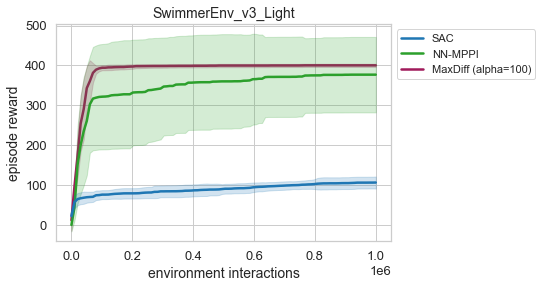

In [6]:
for base_env,ylims in zip(['SwimmerEnv_v3_Light'],[[-50,500]]):
#     for data_file,data_type in zip(['reward_data.pkl','eval_reward_data.pkl'],['train','eval (alpha=0)']):
    for data_file,data_type in zip(['reward_data.pkl'],['train']):
        fig, axs = plt.subplots(1, 1)
        colors = {}
        colors['sac_orig'] = iter(sns.color_palette('tab10',n_colors=9)) 
        colors['mppi'] = iter(sns.color_palette('tab10',n_colors=9)[2:]) 
        colors['maxdiff'] = iter(sns.color_palette('rocket',n_colors=9)[3:])
        for env_idx,(env,method,lgd) in enumerate(zip(envs,methods,plot_legend)):
            data_path = path_dir + '{}/{}/'.format(method, base_env + '_' + env)
            data = process_data(data_path,N=100,get_max=plot_max,data_file=data_file)
            plot_data(axs, data, lgd,color=next(colors[method]),fill=True,zorder=10-env_idx,linewidth=2.5)
            axs.tick_params(axis='both', which='major')

        axs.set_title(base_env)
        axs.set_xlabel( 'environment interactions' )
        axs.set_ylabel( 'episode reward')
        axs.legend(bbox_to_anchor=(1.0,1.0), loc="upper left", ncol=1)
        if save_figs:
            title = 'max' if plot_max else 'mean'
            plt.savefig(f'{save_folder}{base_env}_{title}_combo.svg', bbox_inches='tight')
        plt.show()

### compare light to heavy tails all on one plot

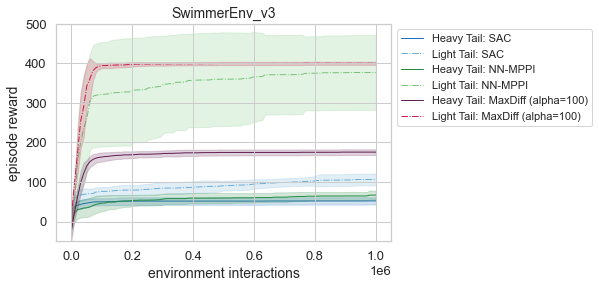

In [7]:
num_colors=3
fig, axs = plt.subplots(1, 1)
colors = {}
colors['sac_orig'] = iter(sns.color_palette("Blues_r",n_colors=num_colors))
colors['mppi'] = iter(sns.color_palette("Greens_r",n_colors=num_colors))
colors['maxdiff'] = iter(sns.color_palette('rocket',n_colors=num_colors))
for idx,(env,method,lgd) in enumerate(zip(envs,methods,plot_legend)):
    for base_env,envs_lgd_mod,ls in zip(['SwimmerEnv_v3', 'SwimmerEnv_v3_Light'],['Heavy Tail: ','Light Tail: '],['solid','dashdot']):
        data_path = path_dir + '{}/{}_{}/'.format(method,base_env,env)
        data = process_data(data_path,N=100,get_max=plot_max)
        plot_data(axs, data, envs_lgd_mod+lgd,color=next(colors[method]),fill=True,raw=False,linestyle=ls)
        axs.tick_params(axis='both', which='major')

axs.set_title('SwimmerEnv_v3')
axs.set_ylim([-50,500])
axs.set_xlabel( 'environment interactions' )
axs.set_ylabel( 'episode reward')
axs.legend(bbox_to_anchor=(1.0,1.0), loc="upper left", ncol=1)
if save_figs: 
    title = 'max' if plot_max else 'mean'
    plt.savefig(f'{save_folder}SwimmerEnv_v3_{title}_compWeightSingle.svg', bbox_inches='tight')
plt.show()

### plot light to heavy tail comparison by learning algorithm

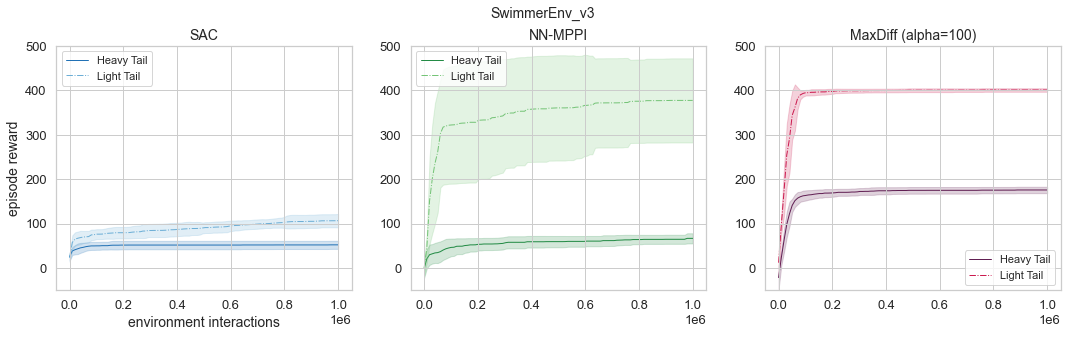

In [8]:
num_colors=3
fig, axss = plt.subplots(1, 3, figsize=(18,4.5) )
for axs,env,method,lgd in zip(axss,envs,methods,plot_legend):
    colors = {}
    colors['sac_orig'] = sns.color_palette("Blues_r",n_colors=num_colors)
    colors['mppi'] = sns.color_palette("Greens_r",n_colors=num_colors)
    colors['maxdiff'] = sns.color_palette('rocket',n_colors=num_colors)
    for env_idx, (base_env,envs_lgd_mod,ls) in enumerate(zip(['SwimmerEnv_v3', 'SwimmerEnv_v3_Light'],['Heavy Tail','Light Tail'],['solid','dashdot'])):
        data_path = path_dir + '{}/{}_{}/'.format(method,base_env,env)
        data = process_data(data_path,N=100,get_max=plot_max)
        plot_data(axs, data, envs_lgd_mod,color=colors[method][env_idx],fill=True,raw=False,linestyle=ls)
        axs.tick_params(axis='both', which='major')

plt.suptitle('SwimmerEnv_v3',y=1.0)
titles = plot_legend
xlabs  = ['environment interactions','','']
ylabs  = ['episode reward','','']
for axs,title,xlab,ylab,loc in zip(axss,titles,xlabs,ylabs,['upper left','upper left','lower right']): 
    axs.set_title(title)
    axs.set_ylim([-50,500])
    axs.set_xlabel(xlab)
    axs.set_ylabel(ylab)
    axs.legend(loc=loc)
if save_figs: 
    plt.savefig(f'{save_folder}SwimmerEnv_v3_compWeightSubplots.svg', bbox_inches='tight')
plt.show()

# Generalizability -- eval learned models (light/heavy tail) on each physics model (light/heavy tail)
evaluated final models, plotting average of 100 evaluations per seed 
- sac is worse when evaluated on different dynamics model than trained on, but the policy learned from the light model out-performs the policy learned on the Heavy Tail model
- maxdiff performed better on the light dynamics model even when learned on the Heavy Tail mode, but the policy learned on the light model still out-performs the policy learned on the Heavy Tail model


In [9]:
# env order 
train_envs = ['SwimmerEnv_v3','SwimmerEnv_v3_Light',]
train_mods = ['Heavy\n','Light\n',]
data_files = ['orig_eval_reward_log.pkl','light_eval_reward_log.pkl',]
eval_mods = ['Heavy','Light']
colors = {}
colors['sac_orig'] = sns.color_palette("Blues_r",n_colors=5)
colors['mppi'] = sns.color_palette("Greens_r",n_colors=5)
colors['maxdiff'] = sns.color_palette('rocket',n_colors=8)
get_max=False

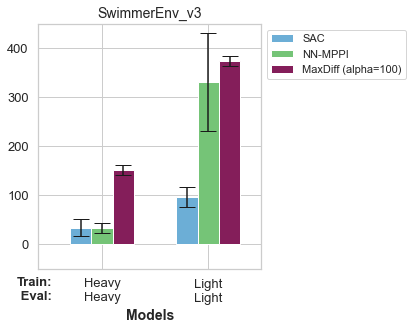

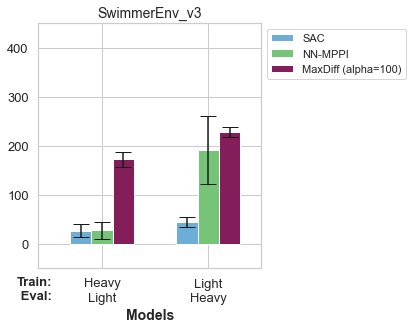

In [10]:
# baseline 
fig, axs = plt.subplots(1, 1,figsize=(4,4.5))
mod_labels = []
for idx,(env,method,lgd,marker) in enumerate(zip(envs,methods,plot_legend,['o','s','d'])):
    pos_idx = 1
    for env_idx,(base_env,train_mod,data_file) in enumerate(zip(train_envs,train_mods,data_files)):
        for shade_idx,(eval_mod,data_file) in enumerate(zip(eval_mods,data_files)):
            if eval_mod in train_mod: 
                hatch = '' if env_idx == shade_idx else '//'
                data_path = path_dir + '{}/{}_{}/'.format(method,base_env,env)
                data = load_data(data_path,data_file=data_file)
                data['x'] = pos_idx + 0.2*(idx-1)
                pos_idx += 1 
                mod_labels.append(train_mod+eval_mod)
                label = lgd if env_idx == 0 and shade_idx == 0 else None
                axs.bar(data['x'], data['mean'],yerr=data['std'],label=label,color=colors[method][2],width=0.2,capsize=8) #,hatch=hatch)

plt.xticks(ticks = range(1,3),labels=mod_labels[:2])
plt.annotate('Train:\n Eval:',[0.2,-113.5],weight='bold',size=13,annotation_clip=False)

axs.set_title('SwimmerEnv_v3')
axs.set_xlim([0.4,2.5])
axs.set_ylim([-50,450])
axs.set_xlabel('Models',weight='bold')
axs.set_ylabel(ylab)
axs.legend(bbox_to_anchor=(1.0,1.0), loc="upper left", ncol=1)
if save_figs: 
    plt.savefig(f'{save_folder}SwimmerEnv_v3_evalByModel_baseline.svg', bbox_inches='tight')
plt.show()


# baseline 
fig, axs = plt.subplots(1, 1,figsize=(4,4.5))
mod_labels = []
for idx,(env,method,lgd,marker) in enumerate(zip(envs,methods,plot_legend,['o','s','d'])):
    pos_idx = 1
    for env_idx,(base_env,train_mod,data_file) in enumerate(zip(train_envs,train_mods,data_files)):
        for shade_idx,(eval_mod,data_file) in enumerate(zip(eval_mods,data_files)):
            if not eval_mod in train_mod: 
                hatch = '' if env_idx == shade_idx else '//'
                data_path = path_dir + '{}/{}_{}/'.format(method,base_env,env)
                data = load_data(data_path,data_file=data_file)
                data['x'] = pos_idx + 0.2*(idx-1)
                pos_idx += 1 
                mod_labels.append(train_mod+eval_mod)
                label = lgd if env_idx == 1 and shade_idx == 0 else None
                axs.bar(data['x'], data['mean'],yerr=data['std'],label=label,color=colors[method][2],width=0.2,capsize=8) #,hatch=hatch)
plt.xticks(ticks = range(1,3),labels=mod_labels[:2])
plt.annotate('Train:\n Eval:',[0.2,-113.5],weight='bold',size=13,annotation_clip=False)

axs.set_title('SwimmerEnv_v3')
axs.set_xlim([0.4,2.5])
axs.set_ylim([-50,450])
axs.set_xlabel('Models',weight='bold')
axs.set_ylabel(ylab)
axs.legend(bbox_to_anchor=(1.0,1.0), loc="upper left", ncol=1)
if save_figs: 
    plt.savefig(f'{save_folder}SwimmerEnv_v3_evalByModel_transfer.svg', bbox_inches='tight')
plt.show()